In [1]:
%load_ext autoreload
%autoreload 2

import torch
from MTLR_plot import plot_loss_profiles, plot_all, plot_loss, plot_singular

In [2]:
temp=torch.load("NewExp_4layer_wide_init{'ortho': 0.3, 'randn': 0.0001}_optimC_randnC0_eps[0.0001]_epsW1___6batches_5_factors_20runs.save_")

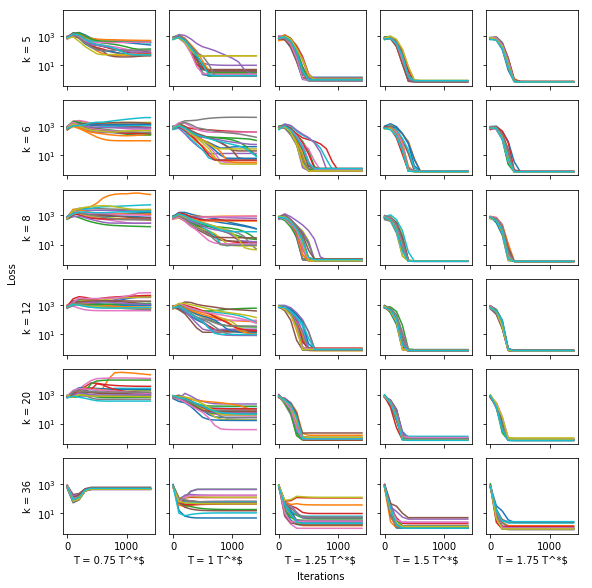

In [50]:
plot_loss_profiles(temp['losses_stack'], 'true', task_batch_factors=temp['task_batch_factors'], x_batch_all=temp['x_batch_all'], plot_type='semilogy', skip=100)

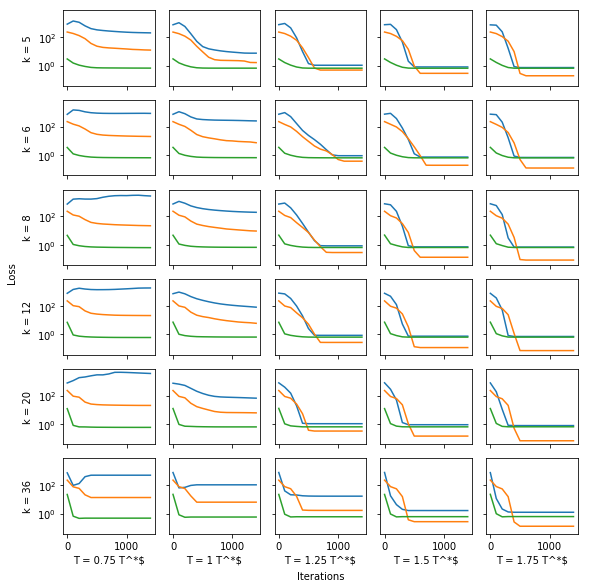

In [48]:
plot_loss_profiles(temp['losses_stack'], None, task_batch_factors=temp['task_batch_factors'], x_batch_all=temp['x_batch_all'], plot_type='mean_semilogy', skip=100)

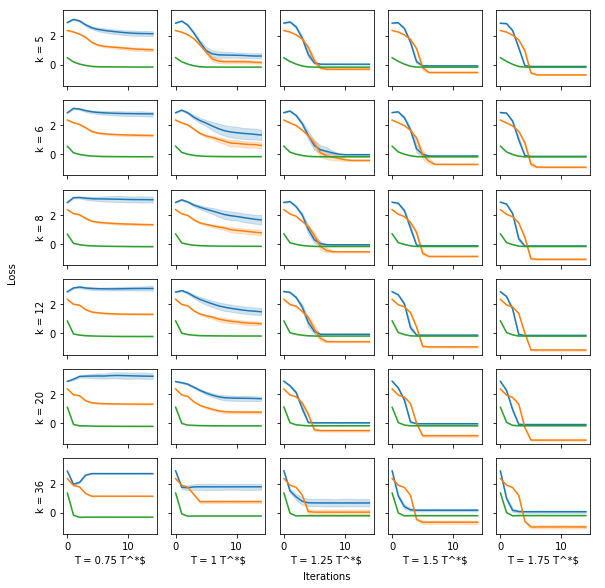

In [40]:
plot_loss_profiles(temp['losses_stack'], None, task_batch_factors=temp['task_batch_factors'], x_batch_all=temp['x_batch_all'], plot_type='errorbar', skip=100)

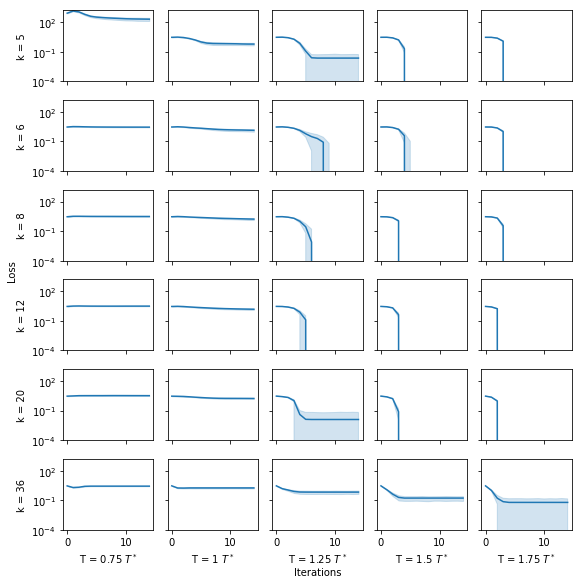

In [85]:
plot_loss_profiles(temp['losses_stack'], 'true', task_batch_factors=temp['task_batch_factors'], x_batch_all=temp['x_batch_all'], plot_type='errorbar', skip=100, ymin=1e-4)

(15, 20)


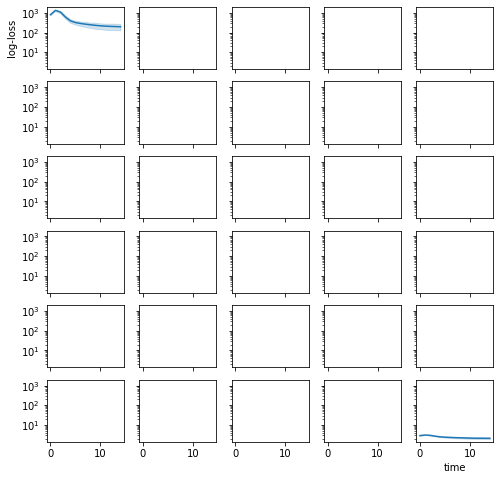

(15, 20)


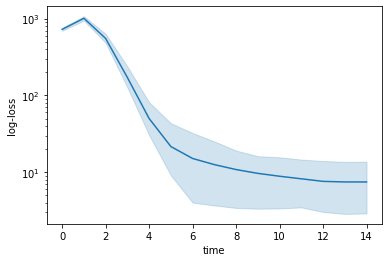

(15, 20)


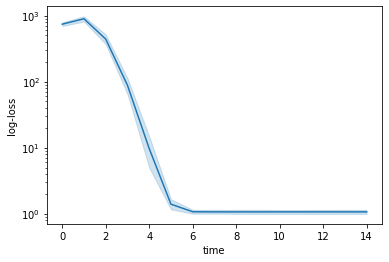

(15, 20)


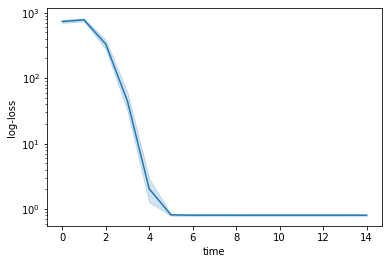

(15, 20)


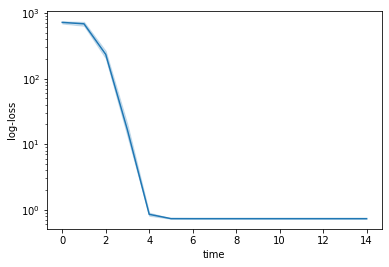

(15, 20)


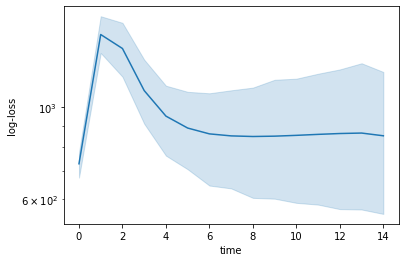

(15, 20)


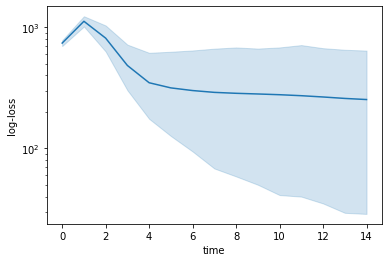

(15, 20)


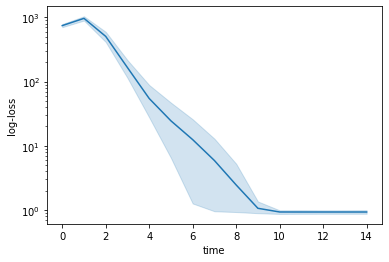

(15, 20)


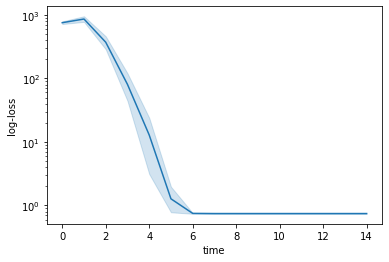

(15, 20)


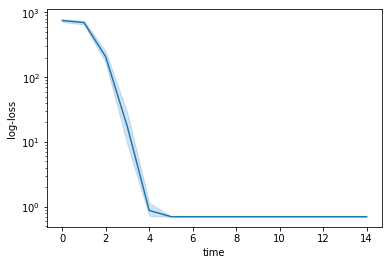

(15, 20)


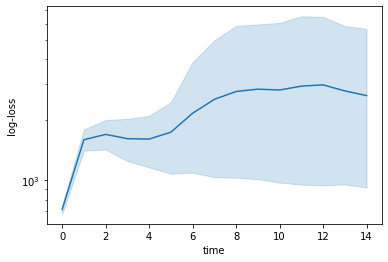

(15, 20)


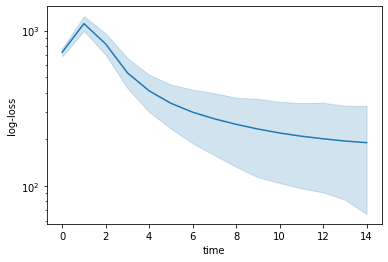

(15, 20)


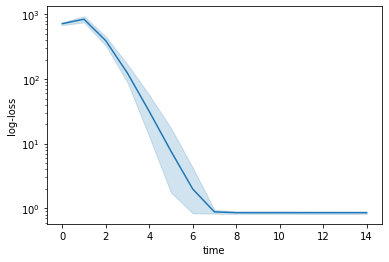

(15, 20)


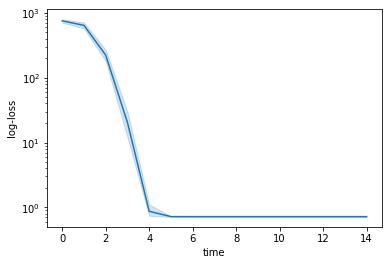

(15, 20)


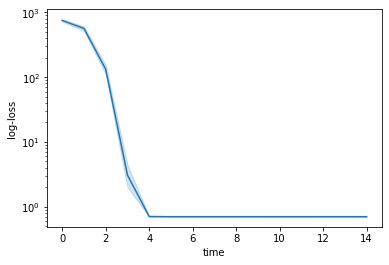

(15, 20)


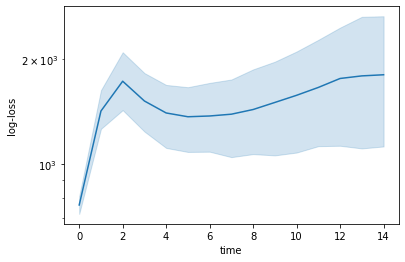

(15, 20)


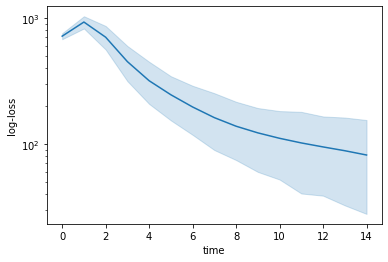

(15, 20)


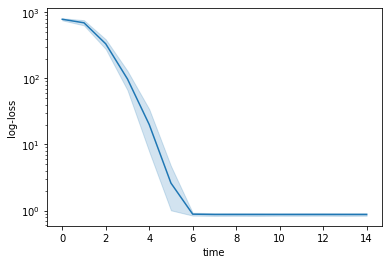

(15, 20)


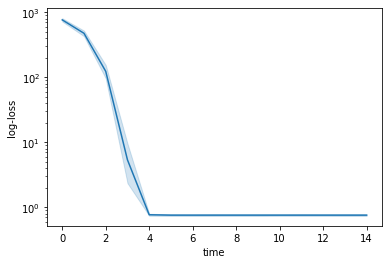

(15, 20)


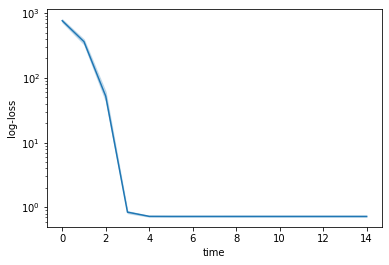

(15, 20)


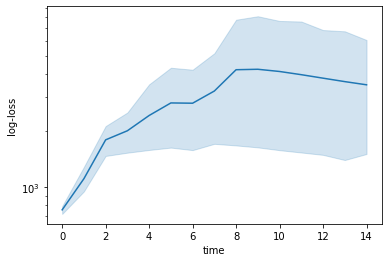

(15, 20)


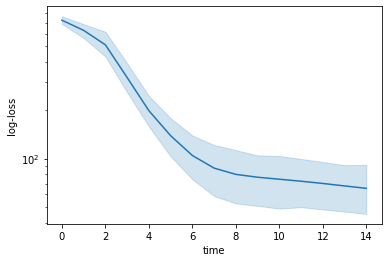

(15, 20)


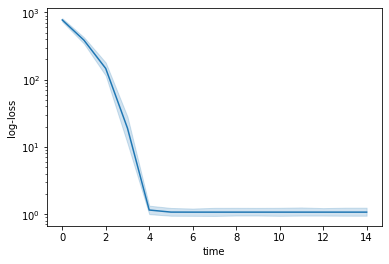

(15, 20)


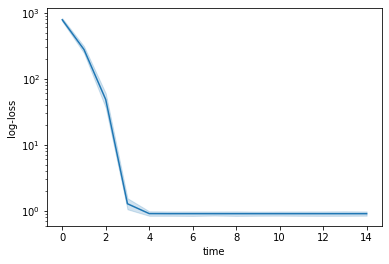

(15, 20)


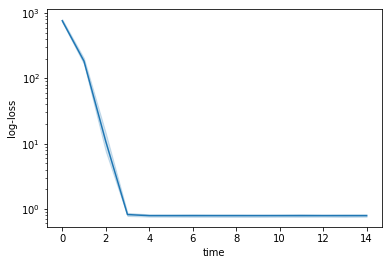

(15, 20)


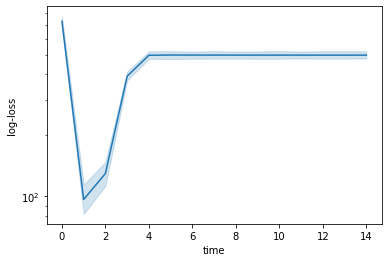

(15, 20)


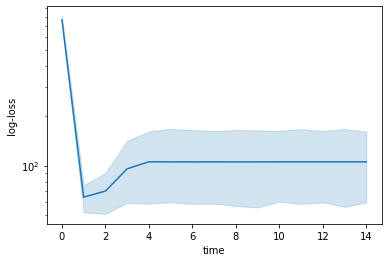

(15, 20)


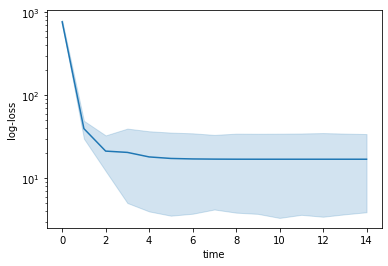

(15, 20)


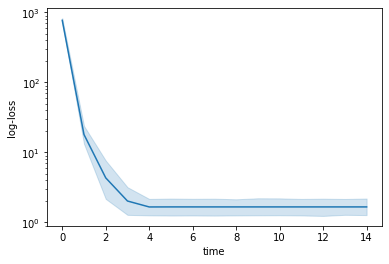

(15, 20)


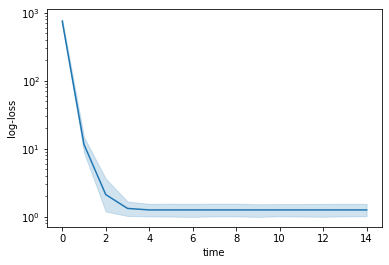

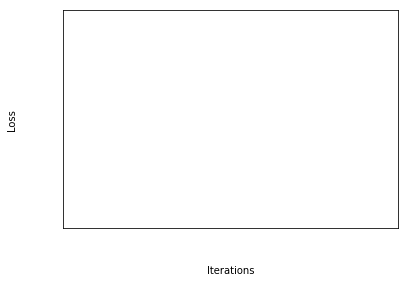

In [83]:
plot_loss_profiles(temp['losses_stack'], 'true', task_batch_factors=temp['task_batch_factors'], x_batch_all=temp['x_batch_all'], plot_type='errorbar', skip=100, ymin=1e-4)

In [36]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

(6, 5, 20, 5, 150)
(6, 5, 20, 150)
(20, 150)


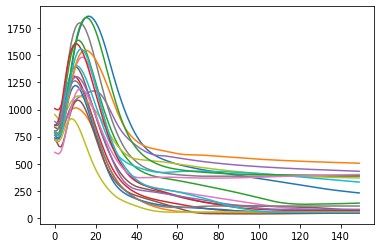

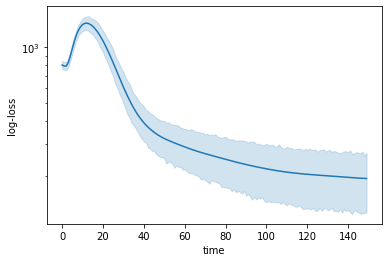

In [77]:
array = temp['losses_stack']

idx=0
skip=10

i_max, j_max, n_repeat, loss_types, t_f_ = array.shape  # misc: true_loss, surrogate_loss, train_loss, test_loss
t_f = t_f_
array = array[...,:t_f:skip]   # clip Time
print(array.shape)
array = array[:,:,:,idx,:]
print(array.shape)


t_ = np.arange(t_f, step=skip)

# fig, axes2d = plt.subplots(max(i_max,2), max(j_max,2), figsize=(8,8), sharex=True, sharey=True)
# i,j=5,2
i,j=0,0
array_ij = array[i,j]
# array_ij = np.moveaxis(array_ij,-1,0) #move time axis to 0
# array_ij = np.log10(array_ij)
print(array_ij.shape)
# set_trace()
# for k in range(1): #range(data.shape[-1]):
#     d_ = data #[:,:,k]
#     print(array_ij.shape)
#     df = pd.DataFrame(d_)
#     df = pd.melt(frame = df,  var_name = 'time',  value_name = 'log-loss')
#     sns.lineplot(data = df, x = 'time', y = 'log-loss', ci=99) #, sort = False)
#     # sns.lineplot(ax = cell, data = df, x = 'time', y = 'log-loss') #, sort = False)
#     plt.yscale('log',nonpositive='clip')


# d_ = array_ij #[:,:,k]
# df = pd.DataFrame(d_) #.T)
# df = pd.melt(frame = df,  var_name = 'time',  value_name = 'log-loss')
# sns.lineplot(data = df, x = 'time', y = 'log-loss') #, sort = False)
# plt.yscale("log", nonpositive='clip')
# plt.show()


d_ = array_ij #[:,:,k]
plt.plot(d_.T)
plt.show()

df = pd.DataFrame(d_) #.T)
df = pd.melt(frame = df,  var_name = 'time',  value_name = 'log-loss')
sns.lineplot(data = df, x = 'time', y = 'log-loss') #, sort = False)
plt.yscale("log", nonpositive='clip')
plt.show()



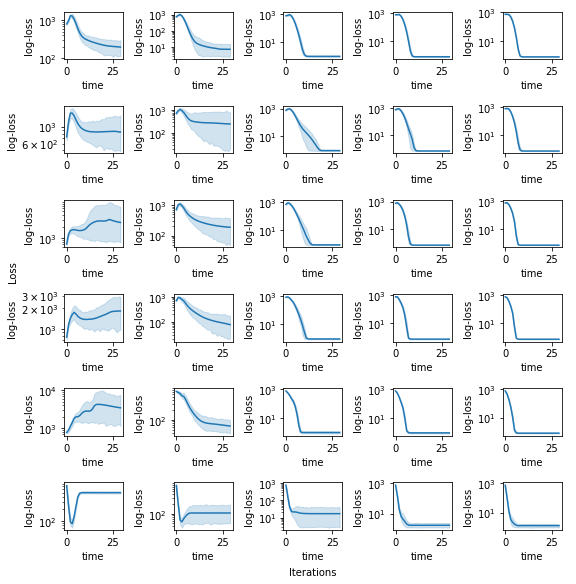

In [101]:
array = temp['losses_stack']

idx=0
skip=50

x_batch_all = [5, 6, 8, 12, 20, 36]
task_batch_factors = [0.75, 1, 1.25, 1.5, 1.75]


i_max, j_max, n_repeat, loss_types, t_f_ = array.shape  # misc: true_loss, surrogate_loss, train_loss, test_loss
t_f = t_f_
array = array[...,:t_f:skip]   # clip Time
array = array[:,:,:,idx,:]

t_ = np.arange(t_f, step=skip)

# fig, axes2d = plt.subplots(max(i_max,2), max(j_max,2), figsize=(8,8), sharex=True, sharey=True)

fig = plt.figure(figsize=(8,8)) #, sharex=True, sharey=True)


# for i, row in enumerate(axes2d):
#     for j, cell in enumerate(row): 

# print(i_max, j_max)
for i in range(i_max):
    for j in range(j_max):  

            array_ij = array[i,j]
            array_ij = np.moveaxis(array_ij,-1,0) #move time axis to 0

            d_ = array_ij #[:,:,k]
            df = pd.DataFrame(d_.T)
            df = pd.melt(frame = df,  var_name = 'time',  value_name = 'log-loss')
            # sns.lineplot(ax = cell, data = df, x = 'time', y = 'log-loss') #, sort = False)
            
            fig.add_subplot(i_max, j_max, j_max*i+j+1)
            sns.lineplot(data = df, x = 'time', y = 'log-loss', ci=99) #, sort = False)
            plt.yscale("log", nonpositive='clip')
            
plt.tight_layout()

fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor="none", bottom=False, left=False)
plt.xlabel("Iterations", labelpad=20)
plt.ylabel("Loss", labelpad=23)    
plt.show()

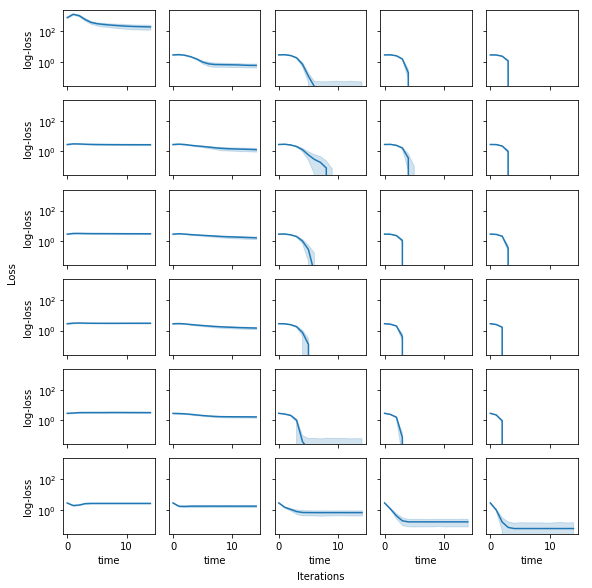